In [75]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns # library to used for visualization
import matplotlib.pyplot as plt # library to used for visualization

In [76]:
# I used this code to check the encoding technique of csv file to load the data by using pd
import chardet

# Detect encoding
with open('/kaggle/input/dataset/Combined.csv', 'rb') as f:
    result = chardet.detect(f.read())
    print(result)


{'encoding': 'Windows-1252', 'confidence': 0.73, 'language': ''}


In [77]:
# First load the dataset and also pass the encoding type
software_House = pd.read_csv('/kaggle/input/dataset/Combined.csv', encoding = 'Windows-1252')
software_House.head()

,City,CompanyName,Rating,Reviews,Address,PhoneNumber,WebsiteURL
0,Gujranwala,Aroush IT Lab,4.5,-43.0,48-C Block? Trust Plaza,0313 7493888,NaN
1,Gujranwala,IvisionsTech Software House ( SEO | Website & ...,5.0,-78.0,"2nd Floor, 672-B, near Mohsin Saeed Fabrics, n...",0321 6661363,http://ivisionstech.com/
2,Gujranwala,Bestosoft | Best software House in Gujranwala,5.0,-3.0,"558X+48V, Pasrur Rd",0309 7150035,http://bestosoft.co/
3,Gujranwala,Innovate Technologies Pakistan,5.0,-124.0,·,0312 2879500,https://innovate.com.pk/
4,Gujranwala,SyncOps,5.0,-54.0,"Mumtaz Market, GT Rd, opposite Chaseup Shoppin...",0301 8678319,https://www.syncops.tech/


In [78]:
# I check the missing values of the dataset
software_House.isna().sum()

City             0
CompanyName      0
Rating          19
Reviews         19
Address          2
PhoneNumber     25
WebsiteURL     112
dtype: int64

In [79]:
# I see overview of dataset to fill the null values
software_House.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 437 entries, 0 to 436
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   City         437 non-null    object 
 1   CompanyName  437 non-null    object 
 2   Rating       418 non-null    float64
 3   Reviews      418 non-null    float64
 4   Address      435 non-null    object 
 5   PhoneNumber  412 non-null    object 
 6   WebsiteURL   325 non-null    object 
dtypes: float64(2), object(5)
memory usage: 24.0+ KB


In [80]:
# I fill the object null values by 'Not-Available' value because i don't know exactly so fill by this.
software_House[['Address','PhoneNumber','WebsiteURL']] = software_House[['Address','PhoneNumber','WebsiteURL']].fillna('Not-Available')

# i fill the float values with 0.0
software_House[['Rating','Reviews']] = software_House[['Rating','Reviews']].fillna(0.0)

# See the null values again to check and verify
software_House.isna().sum()

City           0
CompanyName    0
Rating         0
Reviews        0
Address        0
PhoneNumber    0
WebsiteURL     0
dtype: int64

In [81]:
# Now remove the dublicate rows from the dataset
software_House = software_House.drop_duplicates()

In [82]:
# Now we see there are dublicate rows removed and our data fully cleaned now
software_House.info()

<class 'pandas.core.frame.DataFrame'>
Index: 412 entries, 0 to 436
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   City         412 non-null    object 
 1   CompanyName  412 non-null    object 
 2   Rating       412 non-null    float64
 3   Reviews      412 non-null    float64
 4   Address      412 non-null    object 
 5   PhoneNumber  412 non-null    object 
 6   WebsiteURL   412 non-null    object 
dtypes: float64(2), object(5)
memory usage: 25.8+ KB


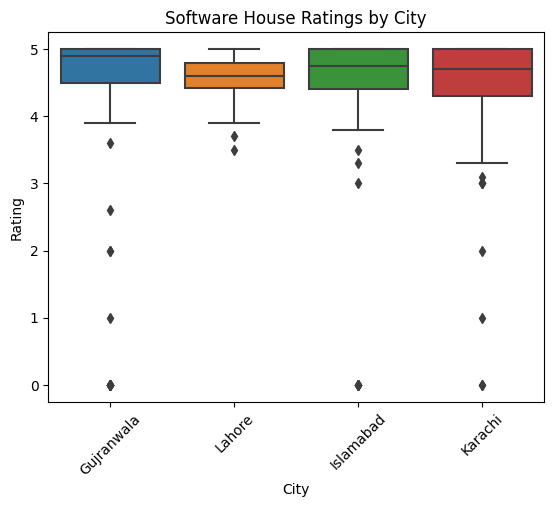

In [83]:
software_House['Rating'] = pd.to_numeric(software_House['Rating'])
sns.boxplot(data=software_House, x=software_House['City'], y=software_House['Rating'])
plt.title('Software House Ratings by City')
plt.xticks(rotation=45)
plt.show()

In [93]:
# 1. Which city has the highest number of software houses?
software_House['City'].value_counts()

City
Islamabad     120
Karachi       120
Gujranwala     98
Lahore         74
Name: count, dtype: int64

In [97]:
# 2. What is the average rating of software houses in each city?
# Ensure 'Rating' is numeric or not
software_House['Rating'] = pd.to_numeric(software_House['Rating'])

avg_ratings = software_House.groupby('City')['Rating'].mean().sort_values(ascending=False)
print(avg_ratings)

City
Lahore        4.594595
Islamabad     4.461667
Karachi       4.455833
Gujranwala    4.239796
Name: Rating, dtype: float64


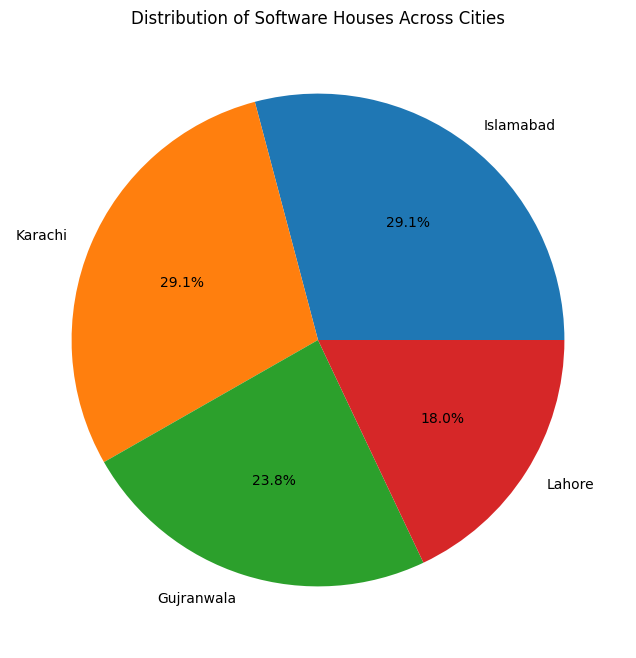

In [99]:
# 3. Patterns in distribution across cities?
# Pie chart for distribution of city values count in percentage
software_House['City'].value_counts().plot.pie(autopct='%1.1f%%', figsize=(8, 8))
plt.title("Distribution of Software Houses Across Cities")
plt.ylabel('')
plt.show()


In [101]:
# 4. Correlation between rating and presence of a website?
# Create a new column: Website_Present = True if URL is available
software_House['Website_Present'] = software_House['WebsiteURL'].apply(lambda x: x != 'Not-Available')

print(software_House.groupby('Website_Present')['Rating'].mean())


Website_Present
False    4.395536
True     4.444333
Name: Rating, dtype: float64


In [105]:
# 5. Contact info completeness by city?
def is_complete(row):
    return all([
        row['PhoneNumber'] != 'Not-Available',
        row['Address'] != 'Not-Available'
    ])

software_House['Contact_Complete'] = software_House.apply(is_complete, axis=1)

# Count percentage(%) of complete contacts per city
completeness = software_House.groupby('City')['Contact_Complete'].mean() * 100
print(completeness)


City
Gujranwala    89.795918
Islamabad     92.500000
Karachi       97.500000
Lahore        97.297297
Name: Contact_Complete, dtype: float64


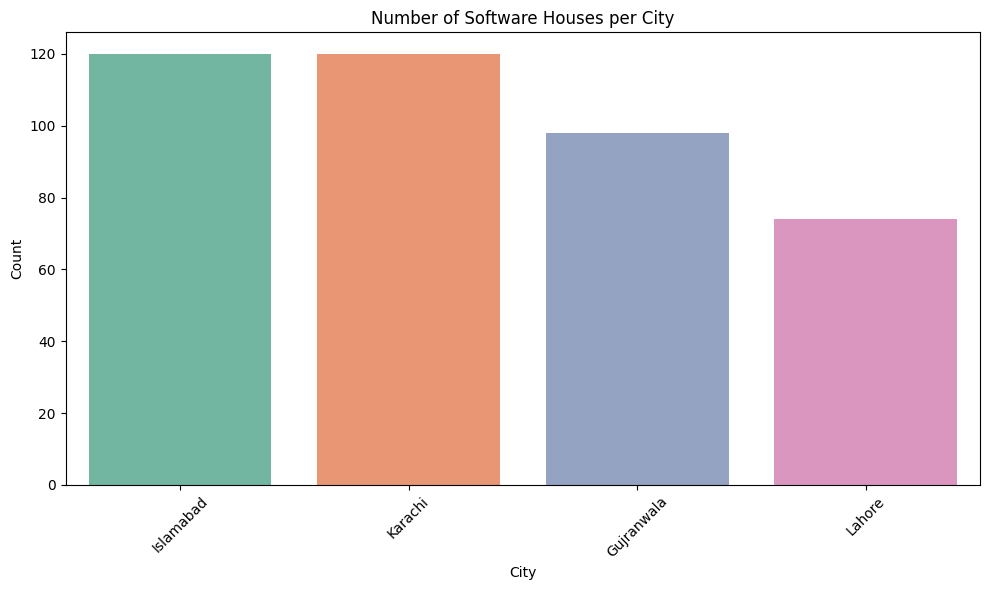

In [107]:
# 1. Bar Chart — Number of Software Houses Per City
plt.figure(figsize=(10, 6))
sns.countplot(data=software_House, x='City', order=software_House['City'].value_counts().index, palette='Set2')
plt.title("Number of Software Houses per City")
plt.xticks(rotation=45)
plt.xlabel("City")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

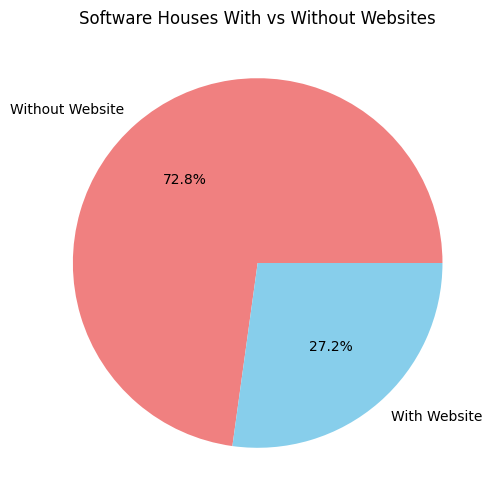

In [109]:
# 2. Pie Chart used to see the Software Houses With/Without Websites
website_counts = software_House['WebsiteURL'].apply(lambda x: x != 'Not-Available').value_counts()
labels = ['Without Website', 'With Website']

plt.figure(figsize=(6, 6))
plt.pie(website_counts, labels=labels, autopct='%1.1f%%', colors=['lightcoral', 'skyblue'])
plt.title("Software Houses With vs Without Websites")
plt.show()


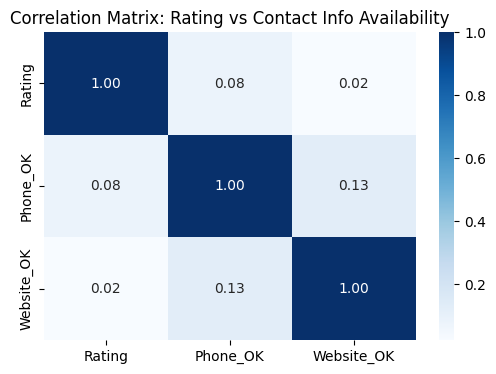

In [112]:
# 3. Correlation Heatmap — Ratings vs Contact Info Completeness

# Add a completeness score (1 if field is filled, 0 if 'Not-Available')
software_House['Phone_OK'] = software_House['PhoneNumber'].apply(lambda x: 0 if x == 'Not-Available' else 1)
software_House['Website_OK'] = software_House['WebsiteURL'].apply(lambda x: 0 if x == 'Not-Available' else 1)

# Make sure rating is float
software_House['Rating'] = pd.to_numeric(software_House['Rating'], errors='coerce')

# Correlation matrix
corr = software_House[['Rating', 'Phone_OK', 'Website_OK']].corr()

plt.figure(figsize=(6, 4))
sns.heatmap(corr, annot=True, cmap='Blues', fmt=".2f")
plt.title("Correlation Matrix: Rating vs Contact Info Availability")
plt.show()


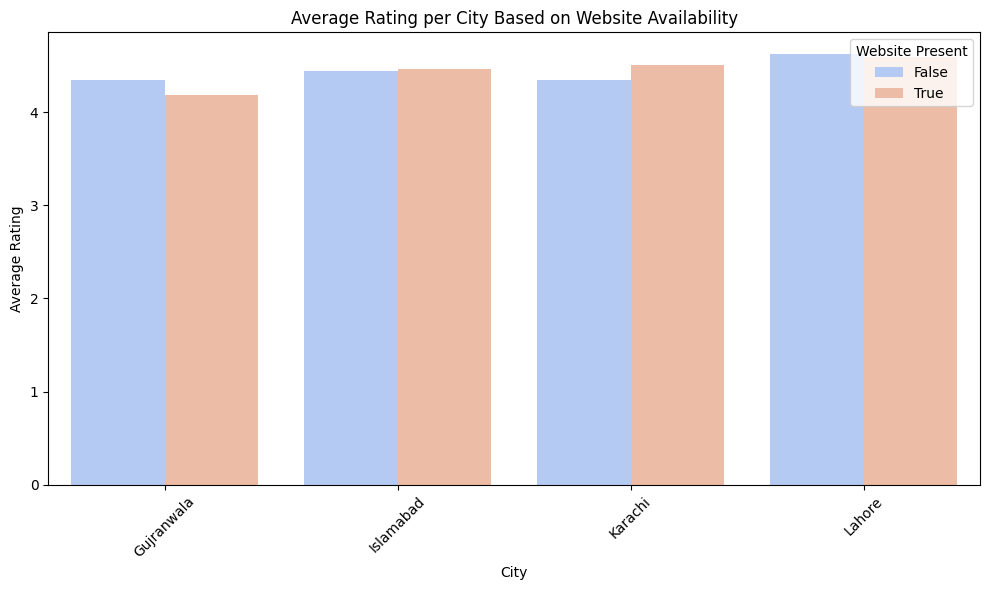

In [114]:
# Visualizing: Average Rating vs Website Presence Per City
# Clean binary website column
software_House['Website_Present'] = software_House['WebsiteURL'].apply(lambda x: x != 'Not-Available')

# Grouped average rating
avg_rating_plot = software_House.groupby(['City', 'Website_Present'])['Rating'].mean().reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(data=avg_rating_plot, x='City', y='Rating', hue='Website_Present', palette='coolwarm')
plt.title("Average Rating per City Based on Website Availability")
plt.xticks(rotation=45)
plt.ylabel("Average Rating")
plt.xlabel("City")
plt.legend(title="Website Present")
plt.tight_layout()
plt.show()


In [115]:
# Save the cleaned Software House cleaned data
software_House.to_csv("cleaned_software_house.csv", index=False)